# 06/05 - Pair Programming EDA 3 - Guadalupe & Lara

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as sdt

📌 Nota: Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

In [ ]:
df = pd.read_csv("ataques_enproceso.csv", index_col = 0)


# Ejercicio 1

Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [ ]:
plt.rcParams["figure.figsize"] = (12,4)

# Ejercicio 2
- Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

In [4]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,N,Minor injury to left thigh,18-Jun-2018


# a)
- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

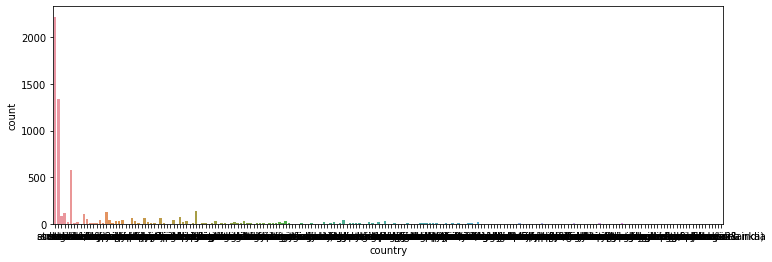

In [ ]:
plt.figure()

sns.countplot(x = df["country"], data = df)

plt.show()

# b) 
Como podemos observar, se ve fatal la gráfica. Sacaremos sólo los 10 países con más ataques.

In [26]:
frecuentes = df.stb.freq(["country"])[:10]
frecuentes

,country,count,percent,cumulative_count,cumulative_percent
0,usa,2222,35.643247,2222,35.643247
1,australia,1335,21.414822,3557,57.058069
2,south africa,577,9.255695,4134,66.313763
3,papua new guinea,134,2.149503,4268,68.463266
4,new zealand,127,2.037215,4395,70.500481
5,brazil,112,1.796599,4507,72.297081
6,bahamas,109,1.748476,4616,74.045557
7,mexico,88,1.411614,4704,75.457170
8,italy,70,1.122875,4774,76.580045
9,fiji,65,1.042669,4839,77.622714


In [42]:
df_2 = df[df["country"].isin(frecuentes["country"])]
df_2.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,N,Minor injury to left thigh,18-Jun-2018


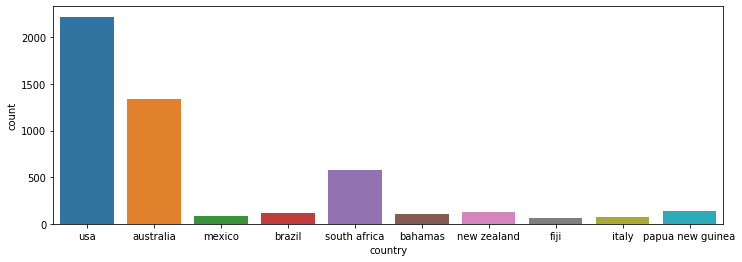

In [40]:
plt.figure()

sns.countplot(x = "country", data = df_2 )

plt.show()

👩🏽‍🦰👩🏽‍🦱💬

- Al reducir nuestro df cogiendo solo aquellos datos que corresponden a 10 países, aquellos con más ataques, podemos ver mejor cuántos ataques han ocurrido en cada uno de ellos.

(*) Faltaría por descubrir cómo, una vez planteada la gráfica, podemos ordenar la x de izquierda a derecha en función de la y (es decir, de más frecuentes a menos, o viceversa).

# c)
Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?


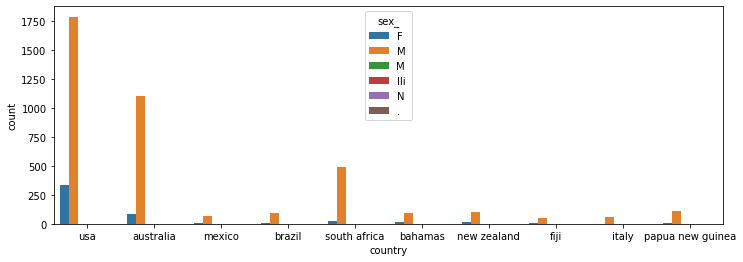

In [41]:
sns.countplot(x = df_2["country"], data = df_2, hue = "sex_")

plt.show()

👩🏽‍🦰👩🏽‍🦱💬

- Aunque la columna "sex_" en este momento no está limpia, la representación gráfica no deja lugar a dudas: la gran mayoría de los ataques los han sufrido personas de género masculino, "M".

# d)

¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.


In [78]:
df_2["age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '34',
       '60', '33', '29', '41', '37', '56', '19', '25', '69', '38', '55',
       '35', '46', '14', '28', '20', '54', '7', '31', '17', '40', '3',
       '13', '8', '50', '16', '73', '20s', '68', '21', '51', '39', '58',
       '30', '26', '22', 'Teen', '47', '61', '65', '42', '36', '66', '43',
       '60s', '9', '49', '59', '6', '27', '64', '23', '45', '71', '44',
       '62', '63', '70', '24', '40s', '53', '50s', 'teen', '77', '74',
       '30s', '5', '86', '12 or 13', 'Teens', '36 & 26', '8 or 10', '84',
       '\xa0 ', '30 or 36', '6½', '75', '33 or 37', 'mid-30s', '23 & 20',
       ' 30', '7      &    31', ' 28', '20?', "60's", '16 to 18', '87',
       '67', 'Elderly', 'mid-20s', 'Ca. 33', ' ', '74 ', '45 ',
       '21 or 26', '>50', 'adult', '9 & 12', '? & 19', '9 months',
       '(adult)', '33 & 37', '25 or 28', '37, 67, 35, 27,  ? & 27',
       '30 & 32', '50 & 30', '17 & 35', '"middle-age"', '34 & 19',
       

👩🏽‍🦰👩🏽‍🦱💬 
- Como en el csv que estamos utilizando ahora aún no habíamos aplicado la limpieza a esta columna, la reproducimos aquí para poder operar:

In [82]:
patron_age = "[0-9]{1,2}" 
df_2['age'] = df_2['age'].astype(str)

def limpieza(col):
    x = re.findall(patron_age, col)
    try:
        return int(x[0])
    except:
        np.NaN

/home/adalaber/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [96]:
df_2["age_para_bins"] = df_2["age"].apply(limpieza)
df_2.head(2)

/home/adalaber/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,mes,age_para_bins,age__para_bins,age_bins
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,57.0,57.0,grupoB
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,N,Minor injury to left thigh,18-Jun-2018,Jun,11.0,11.0,grupoA


/home/adalaber/.local/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
df_2["age_bins"] = pd.cut(df_2["age_para_bins"], 3, labels = ["grupoA", "grupoB", "grupoC"])
df_2.head(2)

/home/adalaber/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,fatal_(y/n),injury,date,mes,age_para_bins,age_bins
0,2018.06.25,2018.0,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018,Jun,57.0,grupoB
1,2018.06.18,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,N,Minor injury to left thigh,18-Jun-2018,Jun,11.0,grupoA


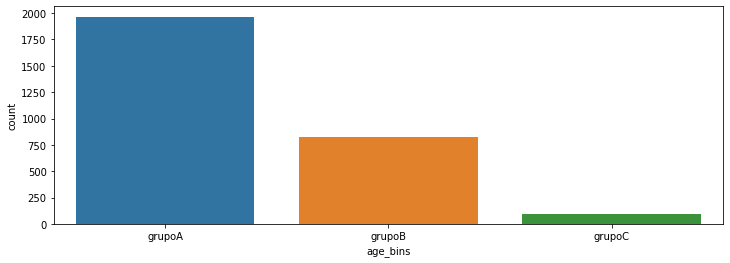

In [103]:
sns.countplot(x = "age_bins", data = df_2)
plt.show()

# e)
- Ataques entre sexos, ¿hay diferencia?


👩🏽‍🦰👩🏽‍🦱💬

- Ya podíamos ver, en la representación dividida por género del número de ataques en los 10 países con mayor frecuencia. Podemos hacer una representación en gráfico de tarta para mostrar visualmente la proporción:

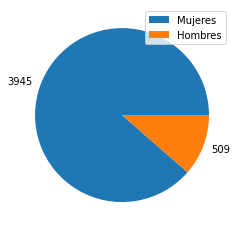

In [77]:
numero_ataques_genero = df_2["sex_"].value_counts()
plt.pie(numero_ataques_genero[:2], labels = numero_ataques_genero[:2])
plt.legend(labels = {"Hombres", "Mujeres"})
plt.show()

#Los registros que no son "M" ni "F" se obvian de momento, pendientes de una limpieda de la columna que permita agruparlos en la variable "otros".

# f)

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

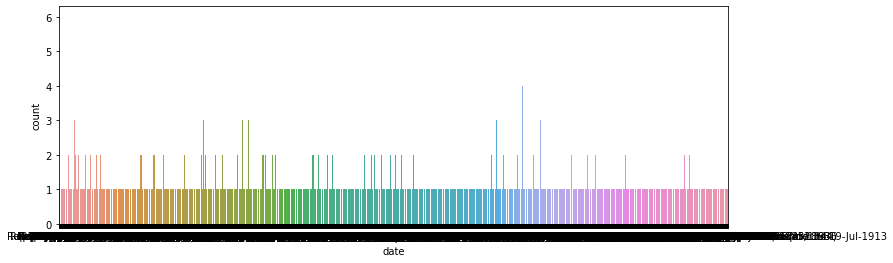

In [50]:
sns.countplot(x = df_2["date"], data = df_2)

plt.show()

👩🏽‍🦰👩🏽‍🦱💬
- Ocurre que, al haber tantos valores únicos, el eje x está lleno de valores. Por eso hacemos una función que agrupe la fecha por meses, creando una nueva columna:

In [46]:
import re
#patron= r"\b\w{3}\b"
patron2= r"(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)"

def funcion(columna):
    x = re.findall(patron2, columna)
    try:
        return x[0] 
    except:
            return "undefined"

df_2["mes"] = df_2["date"].apply(funcion)


/home/adalaber/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


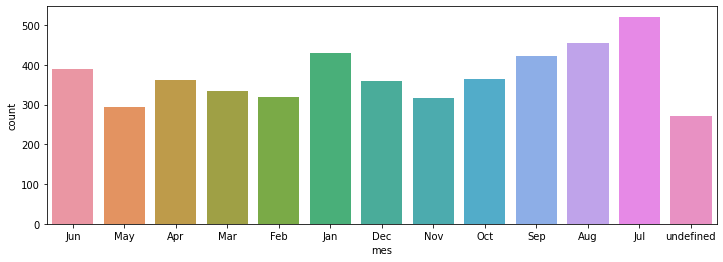

In [49]:
sns.countplot(x = df_2["mes"], data = df_2)

plt.show()